In [1]:
#importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the data
df = pd.read_csv("spam.csv", encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
#renaming the required columns and deleting  the unnecessary ones 
df = df.rename(columns={"v1":"label", "v2":"text"})
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.describe().T

,count,unique,top,freq
label,5572,2,ham,4825
text,5572,5169,"Sorry, I'll call later",30


In [5]:
df.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
df["outcome"]=df.label.map({"ham":0, "spam":1}) #encoding the spam and ham messages
df

,label,text,outcome
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [7]:
df["length"]=df.text.apply(len) #creating a column to store the length of each sms
df

,label,text,outcome,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

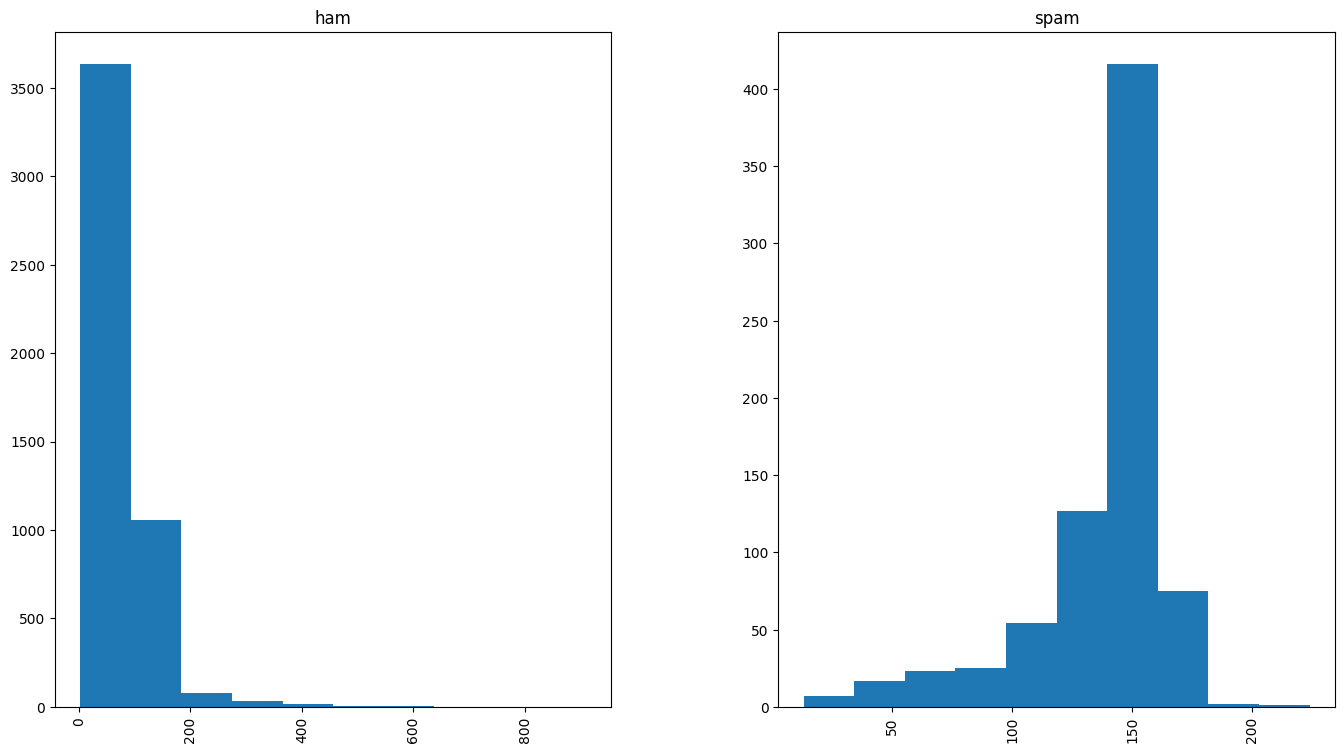

In [8]:
df.hist("length", "label", figsize=(16,9))

seems like spam messages usually have a lot of characters per sms

In [9]:
#importing some packages that are used for processing the sms
from nltk.corpus import stopwords
import re
import string

In [10]:
#some functions for processing the sms

stop_words = set(stopwords.words('english'))
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').lower()
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    text = re.sub(r'[^\x00-\x7f]',r'', text)
    text = re.sub(r'(.)1+', r'1', text)
    text = re.sub('[0-9]+', '', text)
    stopchars= string.punctuation
    table = str.maketrans('', '', stopchars)
    text = text.translate(table)
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    return text
  
#removing contractions
def remove_contractions(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text
  
#implementing the functions  
df["text"].apply(remove_contractions)
df["text"].apply(strip_all_entities)
df

,label,text,outcome,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125


In [11]:
from sklearn.model_selection import train_test_split

X = df["text"]#feature
y = df["outcome"]#target

#splitting the data. 70% for training set and 30% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.7, random_state=1)


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

#setting the vectorizer
vect = CountVectorizer()
vect.fit(X_train)

#learn the vocabulary of the training data, and then utilize it to construct a document-term matrix.
X_train_dtm = vect.transform(X_train)

# fitting and transforming into a single step
X_train_dtm = vect.fit_transform(X_train)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)


In [13]:
from sklearn.feature_extraction.text import TfidfTransformer

#using tfid on the vector
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<3900x7201 sparse matrix of type '<class 'numpy.float64'>'
	with 51759 stored elements in Compressed Sparse Row format>

In [14]:
#Import Naive Bayes algorithm
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [15]:
from sklearn import metrics

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

# print the accuracy score
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred_class))

# print the precision score
print("\nPrecision Score:", metrics.precision_score(y_test, y_pred_class))


Accuracy Score: 0.9832535885167464

Precision Score: 0.9567307692307693


In [16]:
#creating a pipeline 
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bag_of_words', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# print the accuracy score
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred))

# print the precision score
print("\nPrecision Score:", metrics.precision_score(y_test, y_pred))



Accuracy Score: 0.9611244019138756

Precision Score: 1.0


In [17]:
#exporting the pipeline as pkl file
import pickle
pickle.dump(pipe, open('model.pkl', 'wb'))